# Graph  Attention Networks

The Graph Attention Network, or GAT, is a graph neural network which addresses the following questions:
1. Of what importance are the features of a neighbouring node to the primary node?
2. Can we learn this importance, in an automatic manner?

First we discuss the inputs and outputs of the graph attention Layer


# Graph Attention Layer

## Inputs and outputs
**INPUT:** a set of node features $h=\{\bar h_1, \bar h_2, \cdots, \bar h_n\}, \bar h_i\in \mathbb{R}^F$

**OUTPUT:** a set of node features $h'=\{\bar h'_1, \bar h'_2, \cdots, \bar h'_n\}, \bar h'_i\in \mathbb{R}^{F'}$

## Internal computations of the graph attention layer

1. Apply a parameterized linear transformation to every node. $$\textbf{w}.\bar h_i, \textbf{w}\in\mathbb{R}^{F'\times F}$$
2. Apply a self attention mechanism, $a$,  described as $$
\begin{gather}
a:\mathbb{R}^{F'}\times \mathbb{R}^{F'}\to\mathbb{R} \\
e_{i, j} = a(\textbf{w}\cdot\bar h_i, \textbf{w}\cdot\bar h_j)
\end{gather}$$ The coeffecient $e_{i, j}$ specify the importance of node $j$'s feature to node $i$.     where $a$ is a single-layer feed forward neural network 

3. Normalize with respect all neighbors
$$\alpha_{i, j} = \text{softmax}_j(e_{i, j}) = \frac{exp{e_{i, j}}}{\sum\limits_{k\in N(i)} exp(e_{i, k})}$$
4. Use $\alpha$ in message passing
$$h'_i = \sigma\bigg(\sum\limits_{j\in N(i)} \alpha_{i, j} \textbf{w}\cdot h_j\bigg)$$ In practice however we use multi-headed attention which involves calculating multiple overlapping values of $\alpha$ and using that in the formula instead. In Veliˇckovi´'s paper it is suggested to use concatenation in the inner layers of the network and an averaging mechanism for the final layer. These are expresed respectively in the following formulas:
$$
\begin{gather}
h'_i = \bigg|\bigg|_{k=1}^K \sigma\bigg(\sum\limits_{j\in N(i)}\alpha_{i, j}^k\textbf{w}^k h_j\bigg) \\
h'_i = \sigma \bigg( \frac{1}{K}\sum\limits_{k=1}^K\sum\limits_{j\in N(i)} \alpha_{i, j}^k\textbf{w}^k h_j\bigg)
\end{gather}
$$

# Pros of GATs

1. GATs are computationally effecient:
    - Self-attention layers can be parallelized across edges
    - Output features can eb parallelized across nodes
    
2. Allows us to assign different importances to nodes of a same neighborhood.
3. It is applied in a shared manner to all edges in the graph.
    - Not required to have the entire graph before hand
4. Works on both
    - Transductive learning (Cora, Citeseer, Pubmed)
    - Inductive learning (PPI)
5. Addresses problems of the naive approach to dealing with graphs by processing adjacency matrices. (all GNNs share this benefit).

# Message passing implementation of GAT

Message passing network framework as a single formula:

$$x_i^{(k)} = \gamma^{(k)}\bigg(\textbf{x}_i^{(k-1)}, \sum\limits_{j\in N(i)}\phi^{(k)}\bigg(\textbf{x}_i^{(k-1)}, \textbf{x}_j^{(k-1)}, e_{j, 1}\bigg)\bigg)$$
where, 
- $x_i^{(k)}$ is the feature representation of node $i$ at the k-th layer of the computation graph.
- $\gamma^{(k)}$ is a differentiable and trainable function
- $\sum$ is a permutation invariant aggregation scheme
- $\bigg( , \bigg)$ is concatenation
- $\phi^{(k)}$ is a differentiable and trainable function}

# A plan to implement a GAT with Pytorch-geometric

Pytorch Geometric comes with an in-built message passing base class. To implement a GAT-based network we must only supply it with a *message* function, an *update* function, and the *aggregation* scheme.
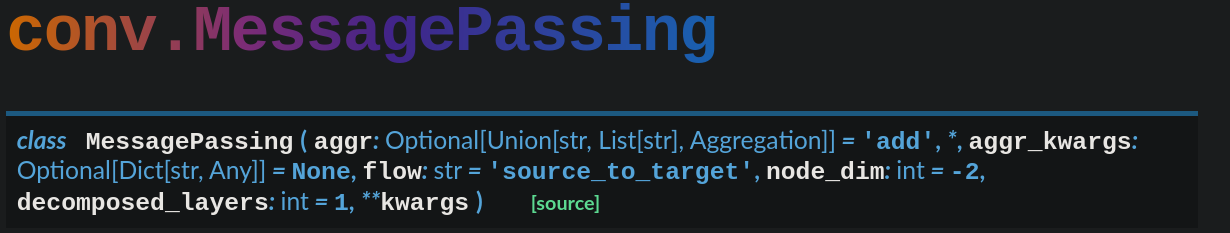

# References
1. [Graph Attention Networks](https://arxiv.org/pdf/1710.10903.pdf)